# VGG

參考文獻 : 《Very Deep Convolutional Networks for Large Scale Image Recognrition》

架構:



![Link Text](http://deanhan.com/2018/07/26/vgg16/table.png)

## VGG16

* 13個Convolutional Layer，以conv3-XXX表示
* 3個Fully Connected Layer，以FC-XXXX表示
* 5個Pool layer以maxpool表示

* 權重層:13(conv3)+3(FC) =16

### VGG16特性

* Convolutional Layer均採用相同的卷積核參數 :<br>
  ** conv3-XXX: kernel size = 3 => 長寬皆為3 =>3x3; XXX => channel number, 其他參數:stride=1，padding=same

* Pool layer均採用相同的池化核参数:<br>
    ** 参数:2×2, stride=2, => 每一個Pool layer的寬高是前一層1/2

![link text](http://deanhan.com/2018/07/26/vgg16/block.png)

![Link Text](http://deanhan.com/2018/07/26/vgg16/VGG16.png)

* Channel數乘倍，64->128->256->512後，不再翻倍
* 寬高減半 224->112->56->28->14->7

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [3]:
def percent(value):
    return '%.2f%%' % (value * 100)

In [4]:
model = VGG16(weights='imagenet',include_top=True)

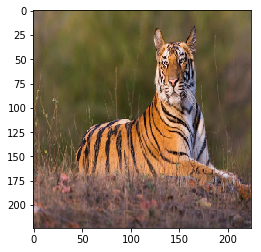

In [5]:
img_path = 'data/img/tiger.jpg'
img = image.load_img(img_path, target_size=(224, 224))

plt.imshow(img)
plt.show()

In [6]:
x = image.img_to_array(img) 
x = np.expand_dims(x, axis=0)#轉化為tensor size(1, 224, 224, 3)
x = preprocess_input(x)

In [7]:
# 進行預測，取得features，維度為 (1,1000)
features = model.predict(x)

In [8]:
# 取得前五個最可能類別跟機率
pred=decode_predictions(features, top=5)[0]

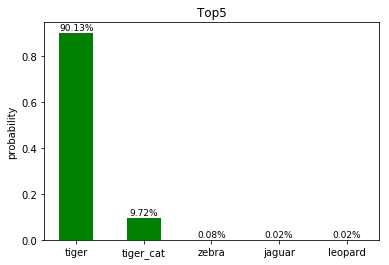

In [9]:
#整理預測結果及數值
values = []
bar_label = []
for element in pred:
    values.append(element[2])
    bar_label.append(element[1])

fig=plt.figure(u"Top5 Prediction Results ")
ax = fig.add_subplot(111) 
ax.bar(range(len(values)), values, tick_label=bar_label, width=0.5, fc='g')
ax.set_ylabel(u'probability') 
ax.set_title(u'Top5') 
for a,b in zip(range(len(values)), values):
    ax.text(a, b+0.0005, percent(b), ha='center', va = 'bottom', fontsize=9)

fig = plt.gcf()
plt.show()

name=img_path[0:-4]+'_pred'
fig.savefig(name, dpi=300)

In [10]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     